# Our probabilistic graph method to perform node classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import pickle
import sys
import os
import time

In [2]:
# importar el modelo
sys.path.append(os.path.abspath(".."))
from model import probabilistic_graph_model 

In [3]:
# carpeta donde se toman los datos
carpeta_datos = ".\\Data\\Probabilistic_Inference_data\\"

# carpeta donde se guardan los parametros
parameters_path = ".\\Models\\Our_model\\"

# archivo donde se ponen los hyperparameters
hyperparameters_file = ".\\Models\\Hyperparameters\\Our_model.csv"

# archivo de predicciones
results_file = ".\\Predictions\\"

## Cargar datos

In [4]:
# cargar el grafo
with open(carpeta_datos + "data_graph.json", 'rb') as f:
    graph = pickle.load(f)
    
num_nodos = graph.number_of_nodes()
num_aristas = graph.number_of_edges()

print(f"Se tienen {num_nodos} nodos")
print(f"Se tienen {num_aristas} aristas")

Se tienen 267774 nodos
Se tienen 281288 aristas


In [5]:
# cargar los indices de subjects
with open(carpeta_datos + 'encode_subj_2_idx.pkl', 'rb') as f:
    encode_subj_2_idx = pickle.load(f)
with open(carpeta_datos + 'decode_idx_2_subj.pkl', 'rb') as f:
    decode_idx_2_subj = pickle.load(f)
    
# ver cuantos son
num_clases = len(encode_subj_2_idx) - 1    # poner -1 para no contar el unknow

print(f"Se tienen {num_clases} subjects diferentes (no se cuenta el unknown)")

Se tienen 63 subjects diferentes (no se cuenta el unknown)


In [6]:
# ver que se tiene
graph.nodes()[6974]

{'thesis': 'On Knots, with a Census of the Amphericheirals with Twelve Crossings',
 'indice_subject': 63,
 'division': 'useless'}

## Create model

In [7]:
# provide all information of the grapg
model = probabilistic_graph_model(graph, 
                                 name_atributes_x = 'thesis',
                                 name_label_y = 'indice_subject',
                                 name_division = 'division',
                                 decode_label = decode_idx_2_subj)

# see model information
model.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 267774
Number of edges: 281288
Number of classes: 63

Training nodes:   141345 (52.79%)
Validation nodes: 15705 (5.87%)
Testing nodes:    17451 (6.52%)
Useless nodes:    93273 (34.83%)
----------------------------------------------------------------------------------------------------


## Out degree distribution

Analize zero truncated power law distribution
For the out distribution


Label: 46 (68—Computer science)
Sample of size 29747

Estimated parameters:
beta = 0.8414966215080513
kappa = 0.9870964491622337
lamda = 0.07491185343999542
Normalization C = 0.3753635768824773

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[25032.          1642.10158918   768.63574459   477.93376753
   333.81613774   248.49290529   192.58420377   153.46308325
   124.80341523   103.08611959    86.19842509    72.79590573
    61.98294329    53.14040241   395.96535731]
Observed values in cells
[25032, 1643, 787, 449, 321, 267, 184, 145, 138, 123, 85, 71, 70, 48, 384]


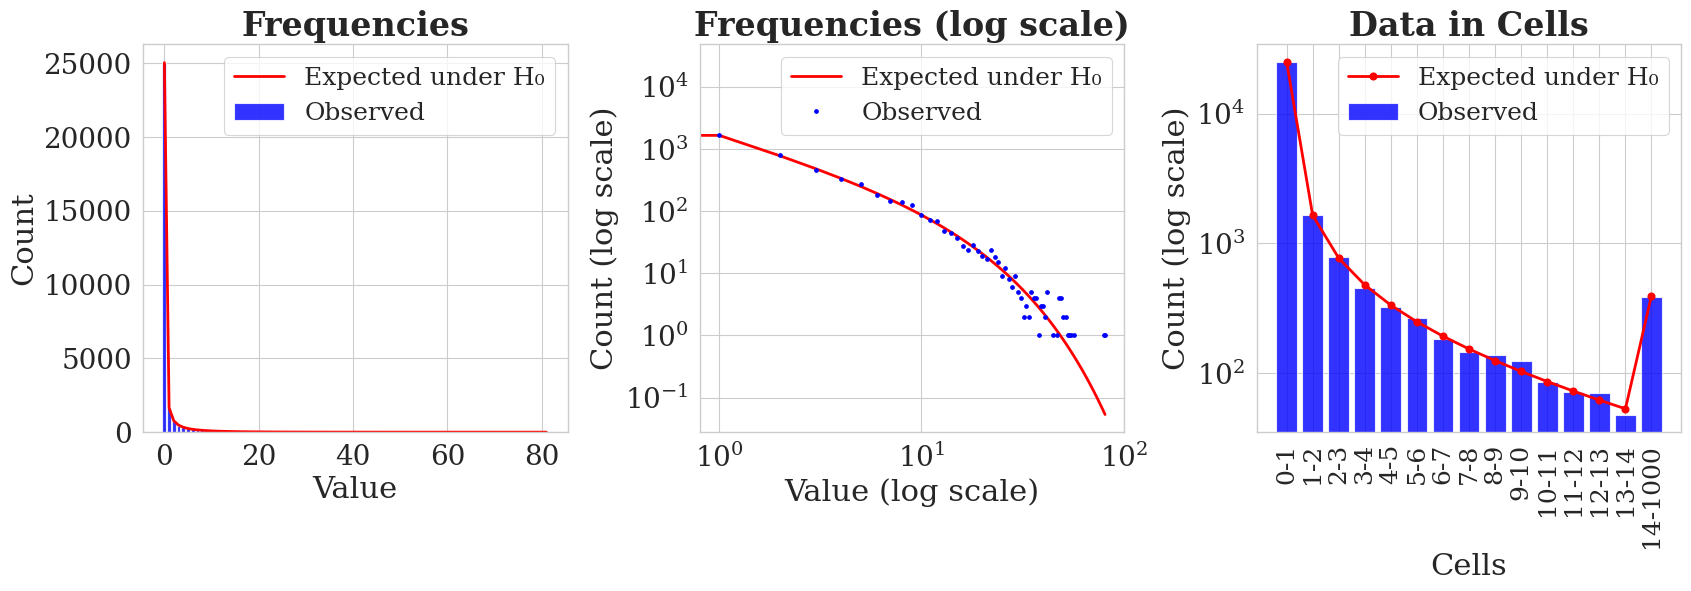


Chi square test 

Statistic T = 12.10966617224831
p-value = 0.355456699921547
The distribution is zero truncated power law
----------------------------------------------------------------------------------------------------


In [8]:
# individual example
model.analize_zero_truncated_pw(mode = "out", 
                                labels_check = [46],
                                number_cells = 15,
                                show_ind_results = True)

Analize zero truncated power law distribution
For the out distribution


Label: 21 (32—Several complex variables and analytic spaces)
Sample of size 735

Estimated parameters:
beta = 0.7931972789115647
kappa = 0.7421691118931448
lamda = 0.15043547790090125
Normalization C = 0.408865365114254

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[583.          53.46759049  27.50059882  17.51133915  12.16915409
   8.87163109   6.66659851   5.11546554   3.98576816   3.14206318
   2.4998953    2.00386357   1.61617859   1.31025761   6.13959589]

Expected values not valid
Reduce k to 14

New Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 1000]]

New expecteed values in cells
[583.          53.46759049  27.50059882  17.51133915  12.16915409
   8.87163109   6.66659851   5.11546554   3.98576816   3.1420631

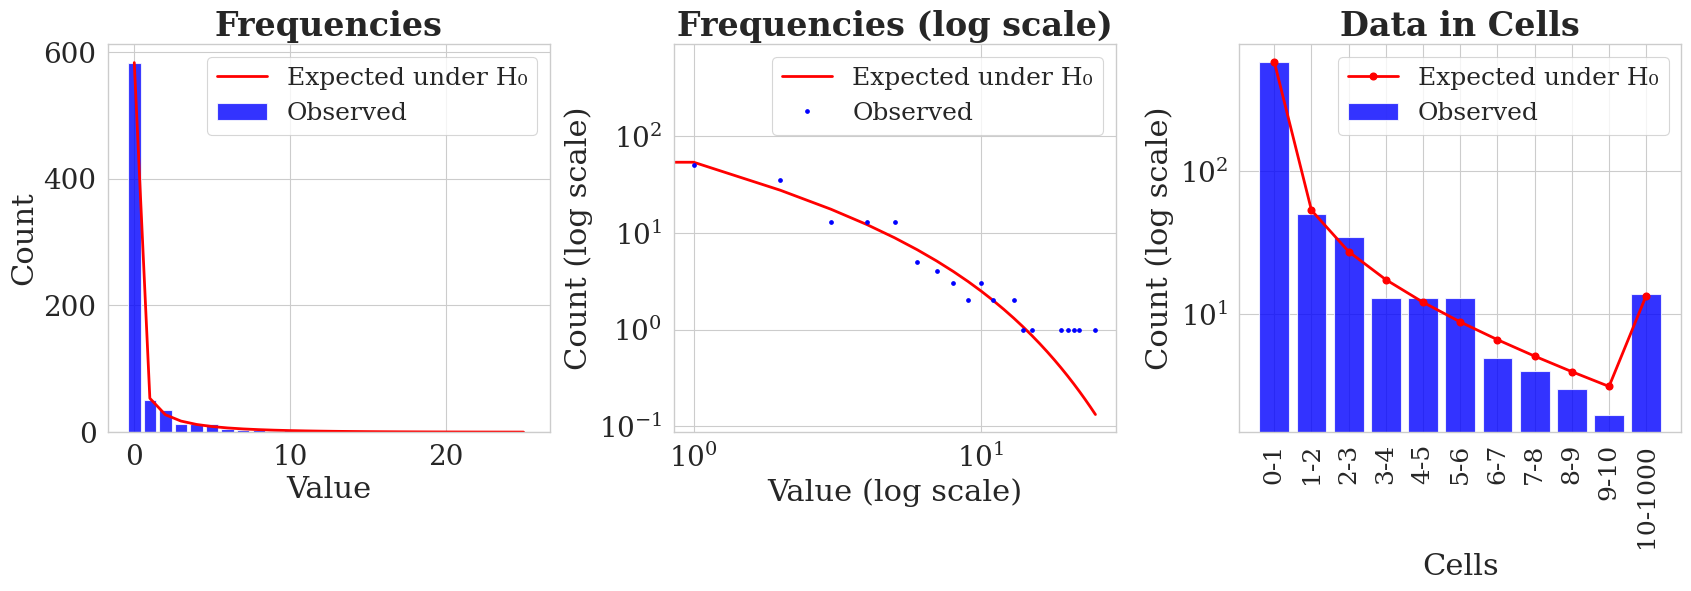


Chi square test 

Statistic T = 6.742466716271725
p-value = 0.4561776948129649
The distribution is zero truncated power law
----------------------------------------------------------------------------------------------------


In [9]:
# individual example where the number of cells is reduced
model.analize_zero_truncated_pw(mode = "out", 
                                labels_check = [21],
                                number_cells = 15,
                                show_ind_results = True)

Analize zero truncated power law distribution
For the out distribution



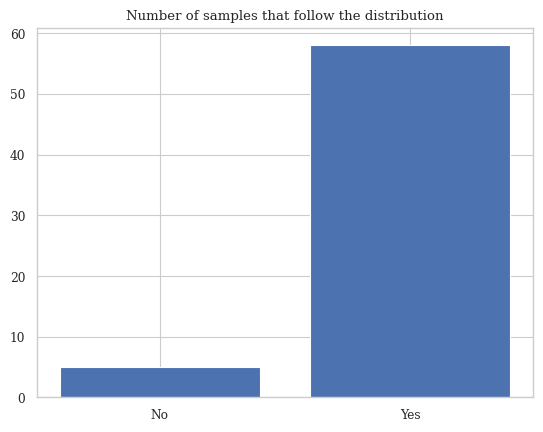


Yes : 58 (92.06349206349206)
No : 5 (7.936507936507937)

Unsuccessful labels:
Label: 0 (00—General)
Label: 35 (49—Calculus of variations and optimal control)
Label: 49 (76—Fluid mechanics)
Label: 58 (91—Game theory, economics, social and behavioral sciences)
Label: 60 (93—Systems theory; control)


In [10]:
# all samples
model.analize_zero_truncated_pw(mode = "out", 
                                number_cells = 15,
                                show_ind_results = False)

Analize zero truncated power law distribution
For the out distribution


Label: 58 (91—Game theory, economics, social and behavioral sciences)
Sample of size 19205

Estimated parameters:
beta = 0.7493361103879198
kappa = 1.5242703710269134
lamda = 0.03147813414988923
Normalization C = 0.5022278949999848

Cells:
[[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [11, 12], [12, 13], [13, 14], [14, 1000]]

Expecteed values in cells
[14391.          2342.8049709    789.24938779   412.22353662
   257.64492398   177.67803769   130.39752305    99.89725484
    78.97458775    63.95084882    52.77506127    44.22464166
    37.53129579    32.19110839   294.45682145]
Observed values in cells
[14391, 2422, 743, 370, 228, 161, 121, 97, 77, 74, 57, 48, 40, 35, 341]


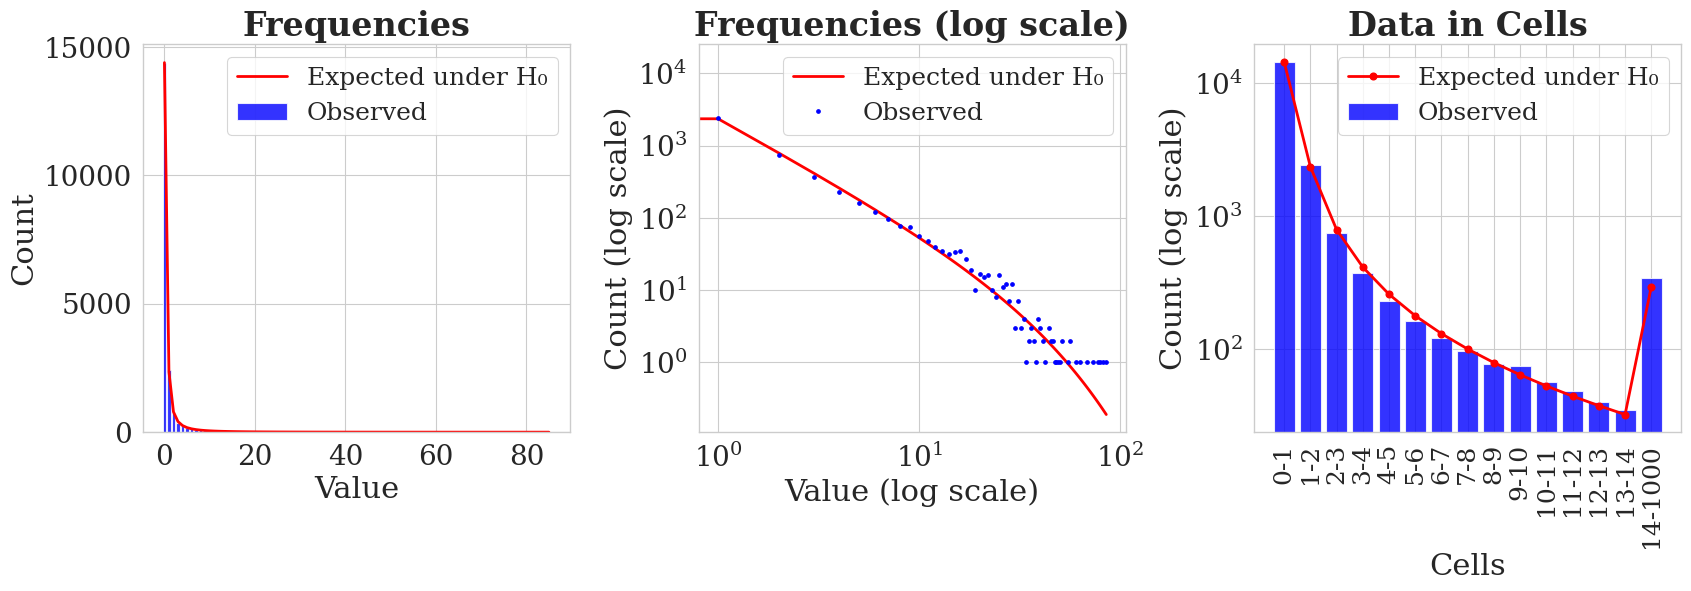


Chi square test 

Statistic T = 25.503240842636597
p-value = 0.007688845762399588
The distribution is NOT zero truncated power law
----------------------------------------------------------------------------------------------------


In [11]:
# see an unsuccessful example
model.analize_zero_truncated_pw(mode = "out", 
                                labels_check = [58],
                                number_cells = 15,
                                show_ind_results = True)

# Classification

Estimating parameters...
Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.4080425690211774, 'f1_weighted': 0.6237028020610783, 'f1_micro': 0.6141992995861191}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


  9%|██████▎                                                                  | 10966/126429 [00:07<01:27, 1321.96it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:29<00:00, 1410.21it/s]


{'f1_macro': 0.5361580133161385, 'f1_weighted': 0.7208746265940658, 'f1_micro': 0.7188793377905126}

In validation nodes
Inference on interation 1 is 71% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10910/126429 [00:08<01:26, 1336.62it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:31<00:00, 1381.37it/s]


{'f1_macro': 0.5250246833288507, 'f1_weighted': 0.7233707182080957, 'f1_micro': 0.731932505571474}

In validation nodes
Inference on interation 1 is 70% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 91% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


  9%|██████▎                                                                  | 10865/126429 [00:07<01:21, 1416.83it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:31<00:00, 1385.91it/s]


{'f1_macro': 0.5440864623170693, 'f1_weighted': 0.7307546215087002, 'f1_micro': 0.728748806112703}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10935/126429 [00:07<01:16, 1516.73it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:28<00:00, 1422.95it/s]


{'f1_macro': 0.5332012288232496, 'f1_weighted': 0.7336416748635284, 'f1_micro': 0.7425660617637695}

In validation nodes
Inference on interation 2 is 96% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 91% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3

Inference using ML


  9%|██████▎                                                                  | 10903/126429 [00:07<01:31, 1264.98it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:25<00:00, 1476.80it/s]


{'f1_macro': 0.5465711091267377, 'f1_weighted': 0.7338299451961422, 'f1_micro': 0.731932505571474}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10869/126429 [00:08<01:23, 1381.86it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1437.10it/s]


{'f1_macro': 0.5336901400924523, 'f1_weighted': 0.7374891909162207, 'f1_micro': 0.7467685450493473}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration


In validation nodes
Inference on iteration 3 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4

Inference using ML


  9%|██████▎                                                                  | 10962/126429 [00:07<01:07, 1708.74it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1439.54it/s]


{'f1_macro': 0.5470927663377123, 'f1_weighted': 0.7341870487926752, 'f1_micro': 0.7323145495065266}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10962/126429 [00:08<01:28, 1308.35it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:25<00:00, 1476.87it/s]


{'f1_macro': 0.532925922899975, 'f1_weighted': 0.7370816517017656, 'f1_micro': 0.7464501751034702}

In validation nodes
Inference on interation 4 is 99% equal to the last iteration


In validation nodes
Inference on iteration 4 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5

Inference using ML


  9%|██████▎                                                                  | 10939/126429 [00:06<01:17, 1495.70it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1447.74it/s]


{'f1_macro': 0.5477849536172175, 'f1_weighted': 0.7351518947783396, 'f1_micro': 0.7333333333333333}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10896/126429 [00:07<01:18, 1470.97it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1445.34it/s]


{'f1_macro': 0.5344932807637236, 'f1_weighted': 0.738144019307326, 'f1_micro': 0.747468958930277}

In validation nodes
Inference on interation 5 is 99% equal to the last iteration


In validation nodes
Inference on iteration 5 yield ML and MAP predictions 90% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6

Inference using ML


  9%|██████▎                                                                  | 10882/126429 [00:07<01:22, 1393.68it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:28<00:00, 1426.23it/s]


{'f1_macro': 0.5466525821150249, 'f1_weighted': 0.7343338705589901, 'f1_micro': 0.7325055714740528}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10958/126429 [00:07<01:25, 1345.75it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1441.09it/s]


{'f1_macro': 0.533383132014408, 'f1_weighted': 0.7373454382788547, 'f1_micro': 0.7467685450493473}

In validation nodes
Inference on interation 6 is 99% equal to the last iteration


In validation nodes
Inference on iteration 6 yield ML and MAP predictions 90% equal

Analize statistics of results in 15705 validation nodes


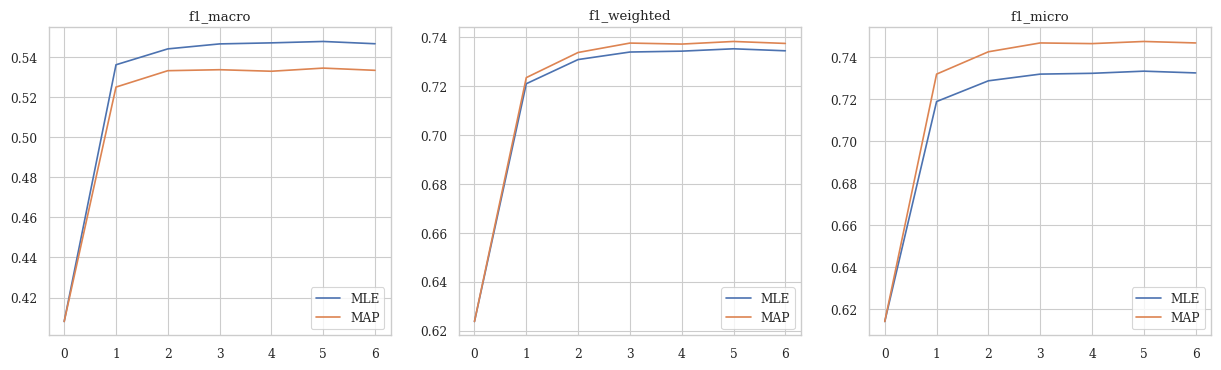

MLE achieves the best f1_macro 0.54778 in iteration 5
MAP achieves the best f1_macro 0.53449 in iteracion 5
Mejor desempeño MLE
{'f1_macro': 0.5477849536172175, 'f1_weighted': 0.7351518947783396, 'f1_micro': 0.7333333333333333}
Mejor desempeño MAP
{'f1_macro': 0.5344932807637236, 'f1_weighted': 0.738144019307326, 'f1_micro': 0.747468958930277}


In [12]:
# set hyperparameters
config = {
    
    "Vectorizer" : "tfidf",  # count tfidf
    "Ngram_range": (1, 2),  # (1, 1) , (1, 2)
    "Min_df": 2,
    "Max_df": 0.5,
    "Max_features": None, # None, 10000, 3000000
    "alpha_omega": 0.035,
    
    "alpha_pi" : 0,
    "alhpa_Theta": 1,
    "alpha_Xi" : 1,
    
    "D_in_max" : 10,
    "psi_dist": "additive_smoothing",           # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_psi": 0.1,                           # en caso de hacer additive_smoothing
    
    "D_out_max": 200,
    "phi_dist": "zero_truncated_power_law",   # additive_smoothing, zero_truncated_power_law, zero_lognormal
    "alpha_phi": 2,                            # en caso de hacer additive_smoothing
    
    "method_iteration_0": "near",            # text, random, near
    "num_iterations": 6,
    "Metric" : "f1_macro", 
}

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)

model.probabilistic_inference_complete(config,
                                       folder_parameters = parameters_path,
                                       prediction_path = results_file,
                                       hyperparameters_file = hyperparameters_file)


## Evaluate Predictions

In [13]:
# validation data
print("ML")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model.evaluar_iteracion_metodo(idx_iteracion = model.best_iter_map_,
                                     metodo = "map"))

ML
{'f1_macro': 0.5477849536172175, 'f1_weighted': 0.7351518947783396, 'f1_micro': 0.7333333333333333}

MAP
{'f1_macro': 0.5344932807637236, 'f1_weighted': 0.738144019307326, 'f1_micro': 0.747468958930277}


In [14]:
# test data
print("ML")
print(model.evaluate_test_nodes(iteration = model.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model.evaluate_test_nodes(iteration = model.best_iter_map_,
                                method = "map"))

ML
{'f1_macro': 0.5705175461408549, 'f1_weighted': 0.7380058006453525, 'f1_micro': 0.736175577330812}

MAP
{'f1_macro': 0.5494960384751082, 'f1_weighted': 0.7373526281478104, 'f1_micro': 0.7463182625637499}


# Robustness Analysis

In [15]:
# folder to save this results (its trash)
parameters_path_ra = ".\\Robustness Analysis\\"
hyperparameters_file_ra = ".\\Robustness Analysis\\hyperparameters.csv"
results_file_ra = ".\\Robustness Analysis\\"

### 1) Graph without edges

In [16]:
# create graph
graph_ra = graph.copy()
graph_ra.remove_edges_from(list(graph_ra.edges))

# create model
model_ra = probabilistic_graph_model(graph_ra, 
                                     name_atributes_x = 'thesis',
                                     name_label_y = 'indice_subject',
                                     name_division = 'division',
                                     decode_label = decode_idx_2_subj)
# see model information
model_ra.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 267774
Number of edges: 0
Number of classes: 63

Training nodes:   141345 (52.79%)
Validation nodes: 15705 (5.87%)
Testing nodes:    17451 (6.52%)
Useless nodes:    93273 (34.83%)
----------------------------------------------------------------------------------------------------


Estimating parameters...


C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:481: RuntimeWarning: divide by zero encountered in log
  matrix_log_phi[i] = np.log(probabilidades)
C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:379: RuntimeWarning: divide by zero encountered in log
  matrix_log_psi[i] = np.log(probabilidades)


Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.4090998171383489, 'f1_weighted': 0.6292204905409385, 'f1_micro': 0.6478191658707418}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:09<00:00, 1820.53it/s]


{'f1_macro': 0.45518654797941593, 'f1_weighted': 0.6342489028291841, 'f1_micro': 0.6317096466093601}

In validation nodes
Inference on interation 1 is 83% equal to the last iteration

Inference using MAP


100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:15<00:00, 1672.18it/s]


{'f1_macro': 0.4090998171383489, 'f1_weighted': 0.6292204905409385, 'f1_micro': 0.6478191658707418}

In validation nodes
Inference on interation 1 is 100% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 83% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:14<00:00, 1706.90it/s]


{'f1_macro': 0.45518654797941593, 'f1_weighted': 0.6342489028291841, 'f1_micro': 0.6317096466093601}

In validation nodes
Inference on interation 2 is 100% equal to the last iteration

Inference using MAP


100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:12<00:00, 1746.56it/s]


{'f1_macro': 0.4090998171383489, 'f1_weighted': 0.6292204905409385, 'f1_micro': 0.6478191658707418}

In validation nodes
Inference on interation 2 is 100% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 83% equal

Analize statistics of results in 15705 validation nodes


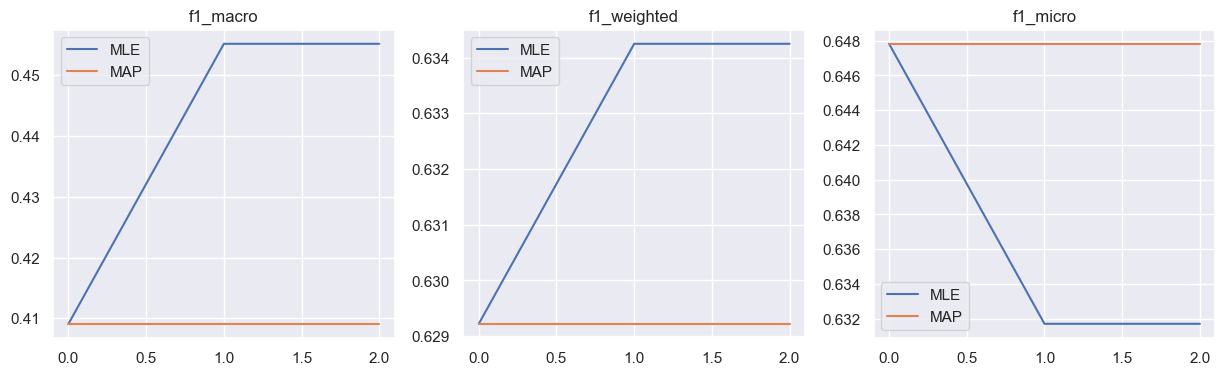

MLE achieves the best f1_macro 0.45519 in iteration 1
MAP achieves the best f1_macro 0.4091 in iteracion 0
Mejor desempeño MLE
{'f1_macro': 0.45518654797941593, 'f1_weighted': 0.6342489028291841, 'f1_micro': 0.6317096466093601}
Mejor desempeño MAP
{'f1_macro': 0.4090998171383489, 'f1_weighted': 0.6292204905409385, 'f1_micro': 0.6478191658707418}


In [17]:
# modify config for no edges
config_ra = config.copy()
config_ra["psi_dist"] = "additive_smoothing"
config_ra["phi_dist"] = "additive_smoothing"
config_ra["alpha_phi"] = 0
config_ra["alpha_psi"] = 0
config_ra["method_iteration_0"] = "text"
config_ra["num_iterations"] = 2

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)
model_ra.probabilistic_inference_complete(config_ra,
                                          folder_parameters = parameters_path_ra,
                                         prediction_path = results_file_ra,
                                         hyperparameters_file = hyperparameters_file_ra)

In [18]:
# evaluate it
print("Validation Data:")
print("ML")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_map_,
                                     metodo = "map"))
print("-"*100)
print("Test Data:")
print("ML")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_map_,
                                method = "map"))

Validation Data:
ML
{'f1_macro': 0.45518654797941593, 'f1_weighted': 0.6342489028291841, 'f1_micro': 0.6317096466093601}

MAP
{'f1_macro': 0.4090998171383489, 'f1_weighted': 0.6292204905409385, 'f1_micro': 0.6478191658707418}
----------------------------------------------------------------------------------------------------
Test Data:
ML
{'f1_macro': 0.46642991400241907, 'f1_weighted': 0.6393064847847244, 'f1_micro': 0.6364105208870552}

MAP
{'f1_macro': 0.420720114562435, 'f1_weighted': 0.6307455742117034, 'f1_micro': 0.647355452409604}


### 2) Graph without attributes

In [19]:
# create an uniform atribute
graph_ra = graph.copy()
for v, info_v in graph_ra.nodes(data=True):
    info_v['null_attribute'] = "gatonegro"
    
# create model
model_ra = probabilistic_graph_model(graph_ra, 
                                     name_atributes_x = 'null_attribute',
                                     name_label_y = 'indice_subject',
                                     name_division = 'division',
                                     decode_label = decode_idx_2_subj)
# see model information
model_ra.print_info()

----------------------------------------------------------------------------------------------------
Number of nodes: 267774
Number of edges: 281288
Number of classes: 63

Training nodes:   141345 (52.79%)
Validation nodes: 15705 (5.87%)
Testing nodes:    17451 (6.52%)
Useless nodes:    93273 (34.83%)
----------------------------------------------------------------------------------------------------


Estimating parameters...
Done!

Precompute omega function
Inference iteration 0
{'f1_macro': 0.4080425690211774, 'f1_weighted': 0.6237028020610783, 'f1_micro': 0.6141992995861191}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1

Inference using ML


  9%|██████▎                                                                  | 10952/126429 [00:07<01:22, 1398.69it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:26<00:00, 1456.12it/s]


{'f1_macro': 0.42899088399925206, 'f1_weighted': 0.6329706109467673, 'f1_micro': 0.609805794333015}

In validation nodes
Inference on interation 1 is 86% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10977/126429 [00:08<01:28, 1310.50it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:29<00:00, 1412.73it/s]


{'f1_macro': 0.4223480940934949, 'f1_weighted': 0.6237446777573832, 'f1_micro': 0.6290353390639923}

In validation nodes
Inference on interation 1 is 86% equal to the last iteration


In validation nodes
Inference on iteration 1 yield ML and MAP predictions 88% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2

Inference using ML


  9%|██████▎                                                                  | 10884/126429 [00:08<01:40, 1155.33it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:28<00:00, 1427.82it/s]


{'f1_macro': 0.44850150230688884, 'f1_weighted': 0.6540100710889382, 'f1_micro': 0.6289079910856415}

In validation nodes
Inference on interation 2 is 94% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10907/126429 [00:07<01:33, 1233.00it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1444.72it/s]


{'f1_macro': 0.4381447941369919, 'f1_weighted': 0.6427815396765761, 'f1_micro': 0.6481375358166189}

In validation nodes
Inference on interation 2 is 95% equal to the last iteration


In validation nodes
Inference on iteration 2 yield ML and MAP predictions 88% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3

Inference using ML


  9%|██████▎                                                                  | 10844/126429 [00:07<01:16, 1510.59it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1446.31it/s]


{'f1_macro': 0.44401668213551004, 'f1_weighted': 0.6507755842493569, 'f1_micro': 0.6257242916268704}

In validation nodes
Inference on interation 3 is 97% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10867/126429 [00:07<01:24, 1363.23it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:27<00:00, 1440.69it/s]


{'f1_macro': 0.4340805827086869, 'f1_weighted': 0.6413416340885957, 'f1_micro': 0.6471824259789876}

In validation nodes
Inference on interation 3 is 98% equal to the last iteration


In validation nodes
Inference on iteration 3 yield ML and MAP predictions 87% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4

Inference using ML


  9%|██████▎                                                                  | 10963/126429 [00:07<01:20, 1442.70it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [01:22<00:00, 1537.49it/s]


{'f1_macro': 0.4482162658561225, 'f1_weighted': 0.6543913285618647, 'f1_micro': 0.6290353390639923}

In validation nodes
Inference on interation 4 is 98% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10882/126429 [00:04<00:56, 2055.71it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:49<00:00, 2579.25it/s]


{'f1_macro': 0.4378562884691649, 'f1_weighted': 0.6433302374417164, 'f1_micro': 0.6488379496975486}

In validation nodes
Inference on interation 4 is 98% equal to the last iteration


In validation nodes
Inference on iteration 4 yield ML and MAP predictions 87% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5

Inference using ML


  9%|██████▎                                                                  | 10991/126429 [00:04<00:46, 2498.15it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:48<00:00, 2611.15it/s]


{'f1_macro': 0.4437312931074593, 'f1_weighted': 0.6509339225108034, 'f1_micro': 0.6257242916268704}

In validation nodes
Inference on interation 5 is 98% equal to the last iteration

Inference using MAP


  9%|██████▎                                                                  | 10885/126429 [00:04<00:44, 2591.68it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:49<00:00, 2546.80it/s]


{'f1_macro': 0.43298651787653547, 'f1_weighted': 0.6413874940405666, 'f1_micro': 0.6473097739573385}

In validation nodes
Inference on interation 5 is 98% equal to the last iteration


In validation nodes
Inference on iteration 5 yield ML and MAP predictions 87% equal
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6

Inference using ML


  9%|██████▏                                                                  | 10821/126429 [00:04<00:48, 2404.80it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:51<00:00, 2456.74it/s]


{'f1_macro': 0.44801334402491555, 'f1_weighted': 0.6543913079781306, 'f1_micro': 0.6289716650748169}

In validation nodes
Inference on interation 6 is 98% equal to the last iteration

Inference using MAP


  9%|██████▏                                                                  | 10808/126429 [00:04<00:47, 2447.62it/s]C:\Users\diego\Downloads\Articulo Tesis Honores\Updated Code\model.py:983: RuntimeWarning: divide by zero encountered in log
  log_probs = np.log(distribuciones.pmf(vector_z))
100%|████████████████████████████████████████████████████████████████████████| 126429/126429 [00:49<00:00, 2552.29it/s]


{'f1_macro': 0.4378544465599247, 'f1_weighted': 0.6433333092571221, 'f1_micro': 0.6488379496975486}

In validation nodes
Inference on interation 6 is 98% equal to the last iteration


In validation nodes
Inference on iteration 6 yield ML and MAP predictions 87% equal

Analize statistics of results in 15705 validation nodes


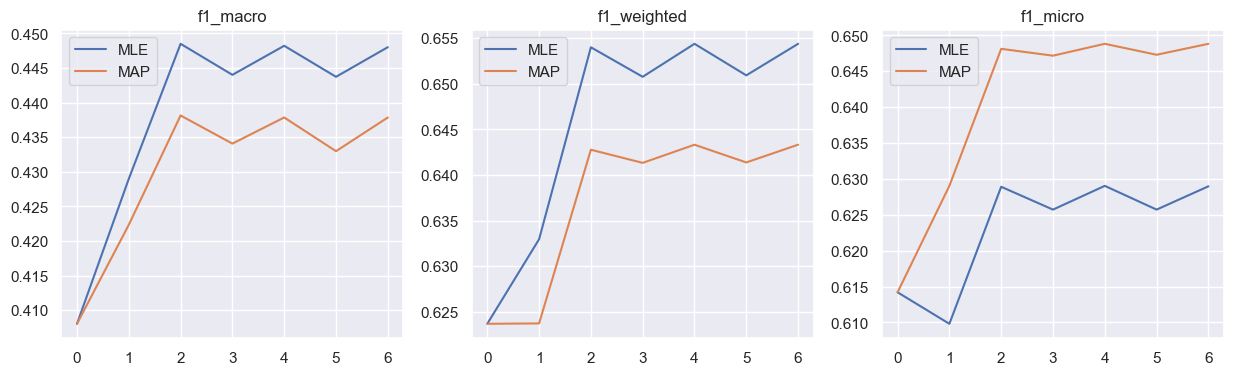

MLE achieves the best f1_macro 0.4485 in iteration 2
MAP achieves the best f1_macro 0.43814 in iteracion 2
Mejor desempeño MLE
{'f1_macro': 0.44850150230688884, 'f1_weighted': 0.6540100710889382, 'f1_micro': 0.6289079910856415}
Mejor desempeño MAP
{'f1_macro': 0.4381447941369919, 'f1_weighted': 0.6427815396765761, 'f1_micro': 0.6481375358166189}


In [20]:
# modify config for no atributes
config_ra = config.copy()
config_ra["method_iteration_0"] = "near"
config_ra["Vectorizer"] = "count"
config_ra["Ngram_range"] = (1, 1)
config_ra["alpha_omega"] = 0
config_ra["Min_df"] = 1
config_ra["Max_df"] = 1.0

# semilla para tener replicabilidad
seed = 42
np.random.seed(seed)
model_ra.probabilistic_inference_complete(config_ra,
                                          folder_parameters = parameters_path_ra,
                                         prediction_path = results_file_ra,
                                         hyperparameters_file = hyperparameters_file_ra)

In [21]:
# evaluate it
print("Validation Data:")
print("ML")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_mle_,
                                     metodo = "mle"))
print("\nMAP")
print(model_ra.evaluar_iteracion_metodo(idx_iteracion = model_ra.best_iter_map_,
                                     metodo = "map"))
print("-"*100)
print("Test Data:")
print("ML")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_mle_,
                                method = "mle"))
print("\nMAP")
print(model_ra.evaluate_test_nodes(iteration = model_ra.best_iter_map_,
                                method = "map"))

Validation Data:
ML
{'f1_macro': 0.44850150230688884, 'f1_weighted': 0.6540100710889382, 'f1_micro': 0.6289079910856415}

MAP
{'f1_macro': 0.4381447941369919, 'f1_weighted': 0.6427815396765761, 'f1_micro': 0.6481375358166189}
----------------------------------------------------------------------------------------------------
Test Data:
ML
{'f1_macro': 0.4498471071046232, 'f1_weighted': 0.6533177135571568, 'f1_micro': 0.6284453612973468}

MAP
{'f1_macro': 0.45126578952117014, 'f1_weighted': 0.6450389816607714, 'f1_micro': 0.6505071342616469}


# Interpretability Example

Using the model with full information (Edges and Attributes)

In [22]:
palette = {"Correct": "#2ca02c", "Incorrect": "#d62728"}

Prediction of node 12408 in iteration 5 using map

test node
True label: 41 (57—Manifolds and cell complexes)

--------------------------------------------------
Information of node 12408:
Text atributes: On Topological Vector Fields

In Degree: 2
Predecesors: [8405, 5408]
	8405 - not training node. Unknown label
	5408 - not training node. Unknown label
Out Degree: 12
Successors: [17748, 19912, 19938, 20062, 20101, 20225, 38362, 67788, 73247, 93054, 98775, 145675]
	17748 - not training node. Unknown label
	19912 - not training node. Unknown label
	19938 - not training node. Unknown label
	20062 - not training node. Unknown label
	20101 - not training node. Unknown label
	20225 - not training node. Unknown label
	38362 - not training node. Unknown label
	67788 - training node. Known label: 41
	73247 - training node. Known label: 41
	93054 - training node. Known label: 41
	98775 - training node. Known label: 41
	145675 - training node. Known label: 41
------------------------------------

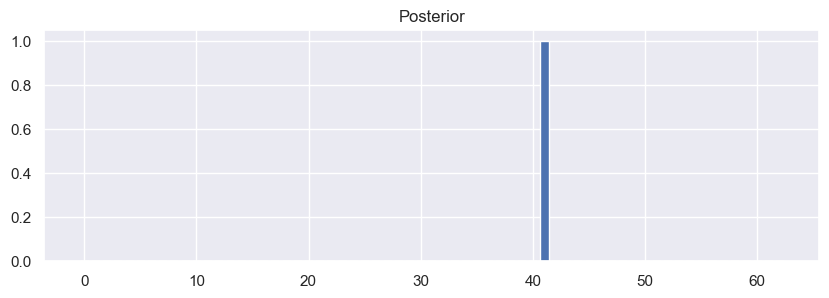

In [23]:
# example node 1
model.see_example_prediction(node_v = 12408, iteration = model.best_iter_map_,
                             method = "map", num_top_labels = 5)

Prediction of node 153133 in iteration 5 using map

test node
True label: 38 (53—Differential geometry)

--------------------------------------------------
Information of node 153133:
Text atributes: Geometric objects in differential geometry

In Degree: 1
Predecesors: [29747]
	29747 - not training node. Unknown label
Out Degree: 2
Successors: [153134, 153140]
	153134 - training node. Known label: 36
	153140 - training node. Known label: 36
--------------------------------------------------

Predict label of 153133 in iteration 5
Use map predictions on iteration 4 for the neihboors of 153133

Predecesors: [29747]
	29747 - not training node. map prediction on iteration 4: 38
Successors: [153134, 153140]
	153134 - training node. Known label: 36
	153140 - training node. Known label: 36

Vector p_v:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vector s_v:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

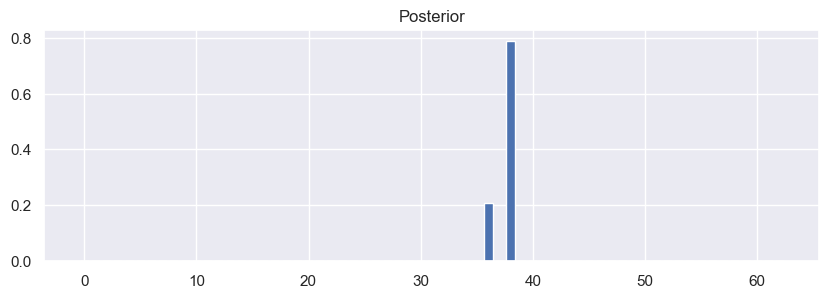

In [24]:
# example node 2
model.see_example_prediction(node_v = 153133, iteration = model.best_iter_map_,
                             method = "map", num_top_labels = 5)

#### Confidence for each node

In [25]:
# for each node, get confidence scores, and correctness
prob_score = []
entr_score = []
correct = []
for v in set(model.val_nodes)|set(model.test_nodes):  # validation and test nodes
    # confidence scores
    conf_scores = model.map_node_confidence_prediction(v, model.best_iter_map_)
    prob_score.append(conf_scores["Probability"])
    entr_score.append(conf_scores["Entropy_Confidence"])
    # check if prediction is correct
    true_label = model.graph.nodes[v][model.name_label_y]
    predicted_label = model.tomar_label_nodo(v, model.best_iter_map_, metodo = "map")
    correct.append(true_label == predicted_label)
# put statistics in a df
df_plot = pd.DataFrame({
    "Probability Confidence": prob_score,
    "Entropy Confidence": entr_score,
    "Correct Prediction": ["Correct" if c else "Incorrect" for c in correct]
})

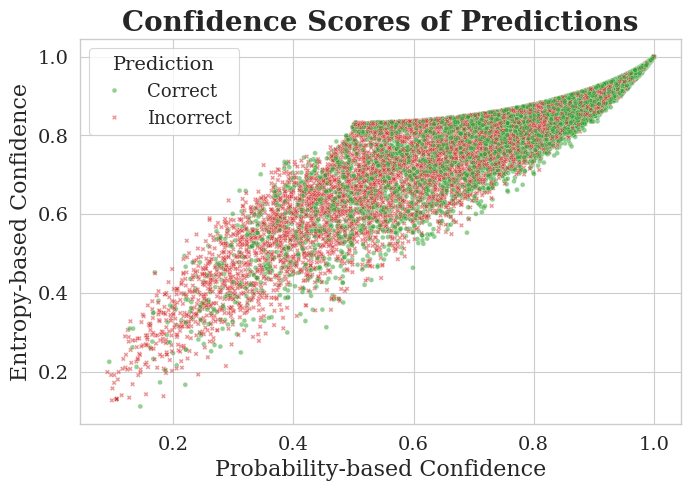

In [26]:
# plot
sns.set(style="whitegrid", context="paper", font="serif")
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(
    data=df_plot,
    x="Probability Confidence",
    y="Entropy Confidence",
    hue="Correct Prediction",
    style="Correct Prediction",  # This adds marker shape differences
    palette=palette,
    s=12,  # marker size
    alpha=0.5  # transparency
)

ax.set_title("Confidence Scores of Predictions", fontsize=20, fontweight='bold')
ax.set_xlabel("Probability-based Confidence", fontsize=16)
ax.set_ylabel("Entropy-based Confidence", fontsize=16)

# Ticks
ax.tick_params(axis='both', labelsize=14)

# Legend
ax.legend(title="Prediction", fontsize=13, title_fontsize=14, loc="best")

# Layout and save
plt.tight_layout()
plt.savefig("confidence_vs_accuracy.jpg", bbox_inches="tight", dpi=300)
plt.show()

In [27]:
# see statistics for each type
print("For correct predictions:")
df_correct = df_plot.loc[df_plot["Correct Prediction"]=="Correct", ["Probability Confidence", "Entropy Confidence"]]
print(f"\tPobability Confidence (Mean): {df_correct['Probability Confidence'].mean():.3}")
print(f"\tEntropy Confidence (Mean):    {df_correct['Entropy Confidence'].mean():.3}")
print("\nFor Incorrect predictions:")
df_incorrect = df_plot.loc[df_plot["Correct Prediction"]=="Incorrect", ["Probability Confidence", "Entropy Confidence"]]
print(f"\tPobability Confidence (Mean): {df_incorrect['Probability Confidence'].mean():.3}")
print(f"\tEntropy Confidence (Mean):    {df_incorrect['Entropy Confidence'].mean():.3}")

For correct predictions:
	Pobability Confidence (Mean): 0.931
	Entropy Confidence (Mean):    0.942

For Incorrect predictions:
	Pobability Confidence (Mean): 0.721
	Entropy Confidence (Mean):    0.785


#### Discrepancies for each node

In [28]:
# for each node, get the diferences 2-1
list_of_dicts = []
for v in set(model.val_nodes)|set(model.test_nodes):  # validation and test nodes
    # get the diff
    dict_node = model.see_example_prediction(node_v = v, iteration = model.best_iter_map_,
                                             method = "map", num_top_labels = 2,
                                             return_12_diff = True, print_info = False)
    # add more info about the node
    true_label = model.graph.nodes[v][model.name_label_y]
    predicted_label = model.tomar_label_nodo(v, model.best_iter_map_, metodo = "map")
    dict_node["Correctness"] = "Correct" if true_label == predicted_label else "Incorrect"
    list_of_dicts.append(dict_node)
# construct df
df_diferences = pd.DataFrame(list_of_dicts)

In [29]:
# improve df
cols_to_melt = [
    "Attributes", 
    "Pred_count", 
    "Succ_count", 
    "Pred_label", 
    "Succ_label", 
    "Prior"
]
new_names = {
    "Attributes": "Node attribute",
    "Pred_count": "Predecessor count",
    "Succ_count": "Successor count",
    "Pred_label": "Predecessors' labels",
    "Succ_label": "Successors' labels",
    "Prior": "Prior"
}
# melt the DataFrame
df_diff = df_diferences.melt(
    id_vars=["Correctness"], 
    value_vars=cols_to_melt,
    var_name="Feature", 
    value_name="Difference"
)
# rename the feature labels
df_diff["Feature"] = df_diff["Feature"].map(new_names)

In [30]:
# Clip each row based on 2nd and 98th percentiles per feature
df_filtered = df_diff.copy()
q_low = df_filtered.groupby("Feature")["Difference"].transform(lambda x: x.quantile(0.02))
q_high = df_filtered.groupby("Feature")["Difference"].transform(lambda x: x.quantile(0.98))
df_filtered = df_filtered[(df_filtered["Difference"] >= q_low) & (df_filtered["Difference"] <= q_high)]

In [31]:
# boxplot
def box_stripplot(data, **kwargs):
    sns.boxplot(
        data=data,
        x="Correctness",
        y="Difference",
        hue="Correctness",
        palette=palette,
        showfliers=False,
        legend=False,
        zorder=3,
    )
    sns.stripplot(
        data=data,
        x="Correctness",
        y="Difference",
        hue="Correctness",
        palette=palette,
        dodge=True,
        jitter=True,
        alpha=0.1,
        size=1,
        zorder=2,
        legend=False,
    )
    plt.axhline(0, color="black", linestyle="--", linewidth=1, zorder=1)
    
# violin
def violin_boxplot(data, **kwargs):
    sns.violinplot(
        data=data,
        x="Correctness",
        y="Difference",
        hue="Correctness",
        palette=palette,
        cut=0,
        inner="box",
        density_norm='width',
        linewidth=1,
        legend=False
    )
    plt.axhline(0, color="gray", linestyle="--", linewidth=0.75)

In [32]:
# select type
type_box = True

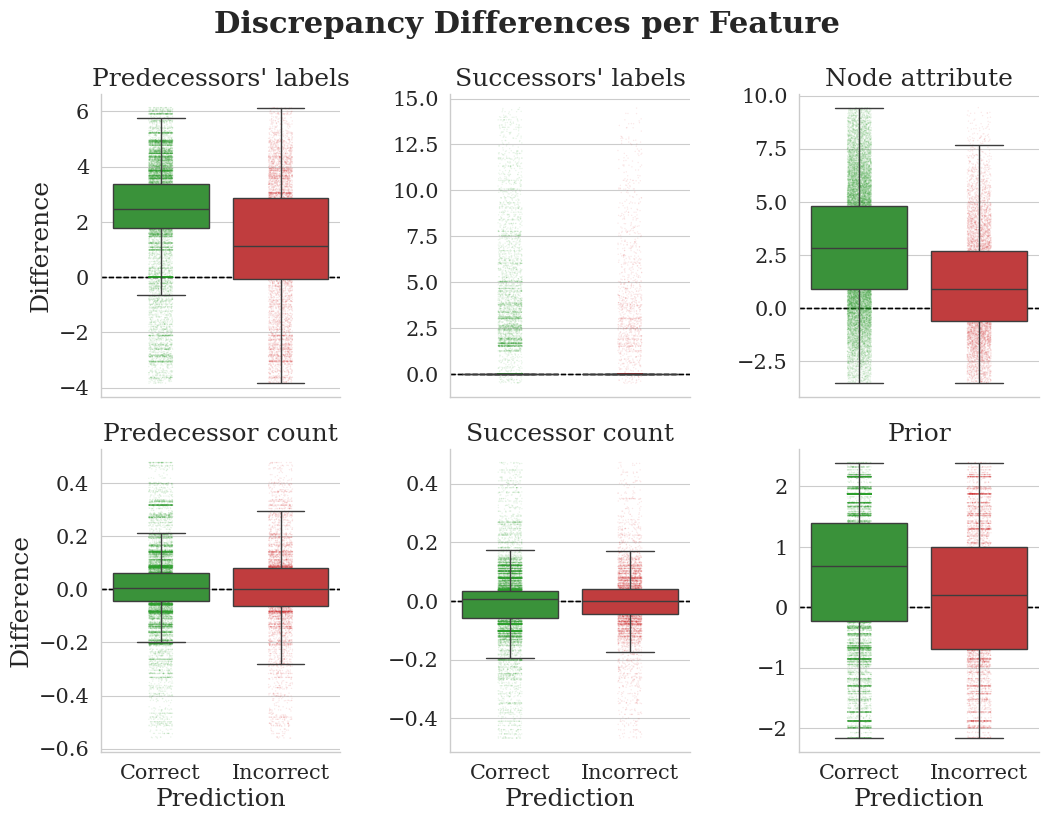

In [33]:
# plot
sns.set(style="whitegrid", context="paper", font="serif", font_scale=1.6)
# Create the FacetGrid by 'Feature'
desired_order  = ["Predecessor count", "Successor count", "Node attribute", "Predecessors' labels", "Successors' labels", "Prior"]
desired_order  = ["Predecessors' labels", "Successors' labels", "Node attribute", "Predecessor count", "Successor count", "Prior"]
g = sns.FacetGrid(
    df_filtered,
    col="Feature",
    hue="Correctness",
    col_wrap=3,
    col_order=desired_order,  # specify desired order here
    height=4.2,  # slightly taller subplots
    aspect=0.85,
    sharey=False
)
if type_box:
    g.map_dataframe(box_stripplot)
else:
    g.map_dataframe(violin_boxplot)
# Set titles and labels
g.set_titles("{col_name}", size=18)
g.set_axis_labels("Prediction", "Difference")
g.set_xlabels("Prediction", fontsize=18)
g.set_ylabels("Difference", fontsize=18)
# Tweak tick parameters and font sizes
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
# Adjust layout
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("Discrepancy Differences per Feature", fontsize=22, fontweight="bold")
# Save and show
g.savefig("discrepancy_differences.jpg", dpi=500, bbox_inches="tight")
plt.show()